# Module 1: Data Collection

In this module, we will:
- Fetch raw [nlp] posts from Stack Exchange API.
- Store the raw JSON to disk.
- Preview basic statistics.


In [1]:
import requests
import time
import json
import pandas as pd


def fetch_nlp_posts(pages=200, pagesize=100, api_key=None):
    """
    Fetches `pagesize` * `pages` posts tagged 'nlp' from Stack Overflow.
    """
    all_posts = []
    for page in range(1, pages + 1):
        url = "https://api.stackexchange.com/2.3/questions"
        params = {
            "site": "stackoverflow",
            "tagged": "nlp",
            "pagesize": pagesize,
            "page": page,
            "order": "desc",
            "sort": "votes",
            "filter": "!nNPvSNP4(R"
        }
        if api_key:
            params["key"] = api_key
        resp = requests.get(url, params=params)
        if resp.status_code != 200:
            print(f"Page {page} failed: {resp.status_code}")
            continue
        data = resp.json()
        all_posts.extend(data["items"])
        print(f"Fetched page {page}")
        time.sleep(0.1)
    return all_posts


# Your Stack Exchange API key
API_KEY = "rl_er8LhnZuyvxwMfLSocJrFh5ch"

# Fetch and save
raw_posts = fetch_nlp_posts(pages=201, pagesize=100, api_key=API_KEY)
with open("raw_nlp_posts.json", "w", encoding="utf-8") as f:
    json.dump(raw_posts, f, ensure_ascii=False, indent=2)
print(f"Total posts fetched: {len(raw_posts)}")

Fetched page 1
Fetched page 2
Fetched page 3
Fetched page 4
Fetched page 5
Fetched page 6
Fetched page 7
Fetched page 8
Fetched page 9
Fetched page 10
Fetched page 11
Fetched page 12
Fetched page 13
Fetched page 14
Fetched page 15
Fetched page 16
Fetched page 17
Fetched page 18
Fetched page 19
Fetched page 20
Fetched page 21
Fetched page 22
Fetched page 23
Fetched page 24
Fetched page 25
Fetched page 26
Fetched page 27
Fetched page 28
Fetched page 29
Fetched page 30
Fetched page 31
Fetched page 32
Fetched page 33
Fetched page 34
Fetched page 35
Fetched page 36
Fetched page 37
Fetched page 38
Fetched page 39
Fetched page 40
Fetched page 41
Fetched page 42
Fetched page 43
Fetched page 44
Fetched page 45
Fetched page 46
Fetched page 47
Fetched page 48
Fetched page 49
Fetched page 50
Fetched page 51
Fetched page 52
Fetched page 53
Fetched page 54
Fetched page 55
Fetched page 56
Fetched page 57
Fetched page 58
Fetched page 59
Fetched page 60
Fetched page 61
Fetched page 62
Fetched page 63
F


# Module 2: Initial Data Exploration

In this module, we will:
- Load the raw JSON into a pandas DataFrame.
- Compute and Visualize basic statistics.


- Show the raw DataFrame head.

In [2]:
# Load data
with open("raw_nlp_posts.json", "r", encoding="utf-8") as f:
    raw_posts = json.load(f)

df = pd.DataFrame(raw_posts)
# Display head and basic stats
display(df.head())
print("Total posts:", len(df))
print("Posts with answers:", df["answer_count"].sum())
print("Average views:", df["view_count"].mean())

,tags,owner,is_answered,view_count,protected_date,closed_date,accepted_answer_id,answer_count,score,last_activity_date,...,last_edit_date,question_id,body_markdown,link,closed_reason,title,community_owned_date,locked_date,migrated_from,posted_by_collectives
0,"[algorithm, machine-learning, nlp, spell-check...","{'account_id': 14736, 'reputation': 13929, 'us...",True,104153,1.406807e+09,1.612953e+09,307344.0,18,470,1525983793,...,1.291676e+09,307291,I&#39;ve been developing an internal website f...,https://stackoverflow.com/questions/307291/how...,Not suitable for this site,How does the Google &quot;Did you mean?&quot; ...,NaN,NaN,NaN,NaN
1,"[python, nlp]","{'account_id': 171844, 'reputation': 5367, 'us...",True,316620,1.448049e+09,NaN,8897648.0,14,288,1741911936,...,1.741912e+09,8897593,I want to take two documents and determine how...,https://stackoverflow.com/questions/8897593/ho...,NaN,How to compute the similarity between two text...,NaN,NaN,NaN,NaN
2,"[python, nlp, google-translate, googletrans]","{'account_id': 13638016, 'reputation': 2451, '...",True,233998,1.610814e+09,NaN,52456197.0,18,225,1679557787,...,1.670697e+09,52455774,I was trying `googletrans` and it was working ...,https://stackoverflow.com/questions/52455774/g...,NaN,googletrans stopped working with error &#39;No...,NaN,NaN,NaN,NaN
3,"[nlp, nltk, lemmatization]","{'account_id': 60131, 'reputation': 272940, 'u...",True,169259,NaN,1.741787e+09,1787121.0,15,208,1708922165,...,1.639645e+09,1787110,When do I use each ?\r\n\r\nAlso...is the NLTK...,https://stackoverflow.com/questions/1787110/wh...,Not suitable for this site,What is the difference between lemmatization v...,NaN,NaN,NaN,NaN
4,"[python, nlp]","{'account_id': 8956441, 'reputation': 2347, 'u...",True,196306,NaN,NaN,39143059.0,17,205,1739400395,...,1.655136e+09,39142778,I want to get this: \r\n\r\n```none\r\nInput t...,https://stackoverflow.com/questions/39142778/h...,NaN,How to determine the language of a piece of text?,NaN,NaN,NaN,NaN


Total posts: 20081
Posts with answers: 25255
Average views: 2153.9476619690254


,tag,count
0,nlp,19737
1,python,9277
2,machine-learning,2465
3,nltk,2264
4,spacy,1727
5,stanford-nlp,1315
6,python-3.x,1201
7,java,1083
8,tensorflow,924
9,huggingface-transformers,920


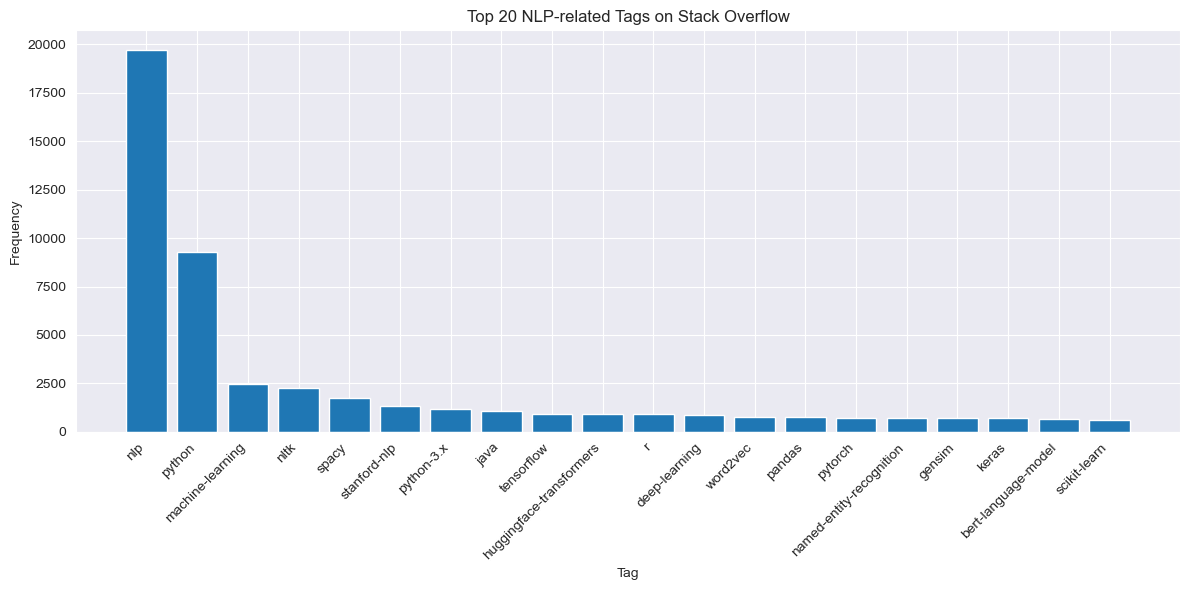

In [3]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load raw posts data
with open("raw_nlp_posts.json", "r", encoding="utf-8") as f:
    raw_posts = json.load(f)

# Flatten tags and count frequencies
all_tags = [tag for post in raw_posts for tag in post.get("tags", [])]
tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common(20)

# Prepare DataFrame
df_tags = pd.DataFrame(top_tags, columns=["tag", "count"])
display(df_tags)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_tags["tag"], df_tags["count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Tag")
plt.ylabel("Frequency")
# Top 20 NLP-related Tags on Stack Overflow
plt.title("Top 20 NLP-related Tags on Stack Overflow")
plt.tight_layout()
plt.show()



- Plot a pie chart of posts with answers vs. posts without answers.
- Plot a pie chart of, among answered posts, those with an accepted answer vs. those without.


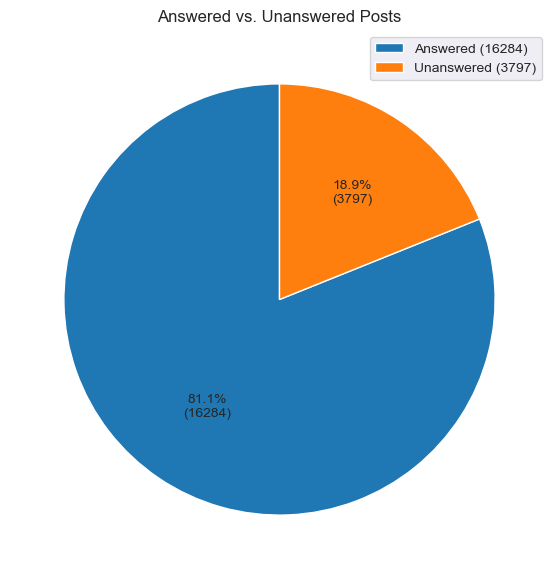

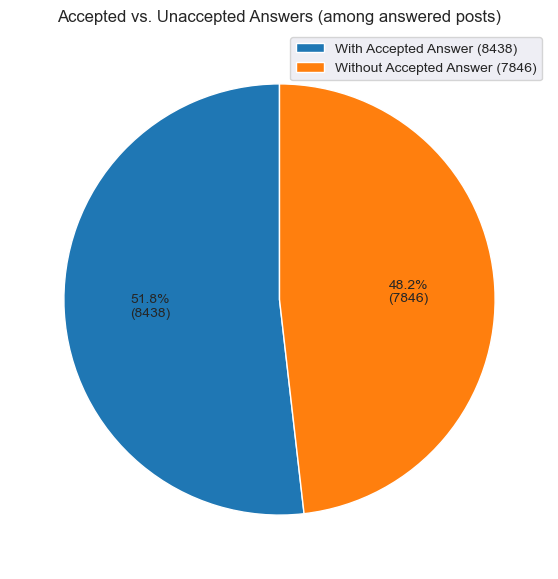

In [4]:
import matplotlib.pyplot as plt


# Custom format for displaying percentages and quantities
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, count)

    return my_autopct


# ===== Pie 1: Answered vs Unanswered =====
total_posts = len(df)
answered_count = (df['answer_count'] > 0).sum()
unanswered_count = (df['answer_count'] == 0).sum()
values1 = [answered_count, unanswered_count]
labels1 = ['Answered', 'Unanswered']

plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(
    values1,
    labels=None,
    autopct=make_autopct(values1),
    startangle=90
)
plt.title('Answered vs. Unanswered Posts')

# Add legend
legend_labels1 = [f'{label} ({value})' for label, value in zip(labels1, values1)]
plt.legend(patches, legend_labels1, loc='upper right')
plt.show()

# ===== Pie 2: With vs Without Accepted Answer =====
answered_df = df[df['answer_count'] > 0]
with_accepted = answered_df['accepted_answer_id'].notnull().sum()
without_accepted = answered_df['accepted_answer_id'].isnull().sum()
values2 = [with_accepted, without_accepted]
labels2 = ['With Accepted Answer', 'Without Accepted Answer']

plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(
    values2,
    labels=None,
    autopct=make_autopct(values2),
    startangle=90
)
plt.title('Accepted vs. Unaccepted Answers (among answered posts)')

# Add legend
legend_labels2 = [f'{label} ({value})' for label, value in zip(labels2, values2)]
plt.legend(patches, legend_labels2, loc='upper right')
plt.show()


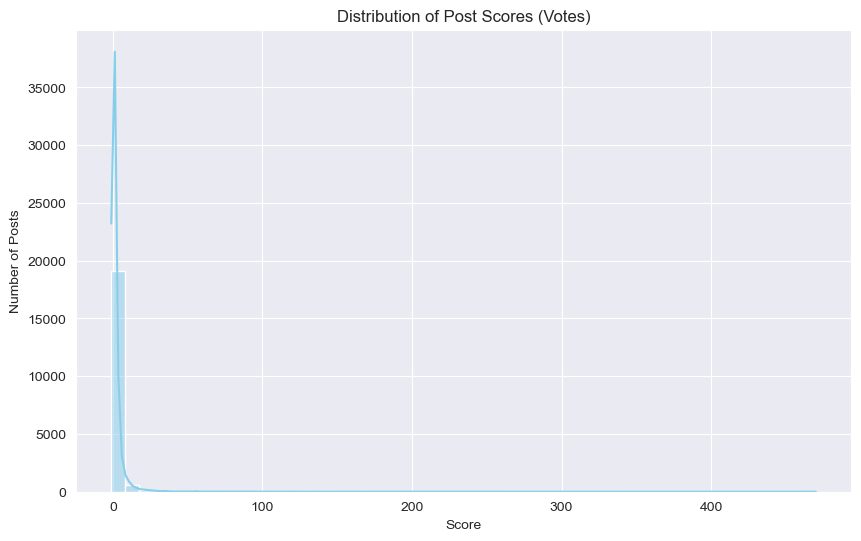

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to visualize the distribution of post scores (upvotes minus downvotes)
# This helps understand how community votes are distributed across NLP questions
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=50, kde=True, color='skyblue')

plt.title('Distribution of Post Scores (Votes)')
plt.xlabel('Score')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()



# Module 3: Data Cleaning

In this module, we will:
- Remove Markdown Style from post bodies.
- Convert text to lowercase.
- Remove stop words.
- Tokenize text.


In [6]:
# Import necessary libraries for API requests and data handling
import requests
import time
import json
import pandas as pd
from typing import List

# Stack Exchange API key for authentication
API_KEY = "rl_er8LhnZuyvxwMfLSocJrFh5ch"


# Function to fetch the content of accepted answers from Stack Overflow
# This is necessary because the initial API call only gives us the IDs of accepted answers, not their content
def fetch_accepted_answers_with_body(answer_ids: List[int]) -> List[dict]:
    """
    Fetches the full content of multiple accepted answers using their IDs.

    Args:
        answer_ids: List of accepted answer IDs to fetch

    Returns:
        List of dictionaries containing answer data including the body content
    """
    all_answers = []
    # Process in batches of 30 to avoid hitting API limits
    for i in range(0, len(answer_ids), 30):
        # Extract a batch of IDs
        batch = answer_ids[i:i + 30]
        # Convert IDs to semicolon-separated string for the API
        ids_str = ";".join(map(str, batch))
        # Construct the API URL
        url = f"https://api.stackexchange.com/2.3/answers/{ids_str}"
        # Set API parameters
        params = {
            "site": "stackoverflow",  # Specify the site
            "filter": "!nNPvSNe7Gv",  # Custom filter to include body_markdown
            "key": API_KEY  # API key for authentication
        }
        # Make the API request
        resp = requests.get(url, params=params)
        if resp.status_code == 200:
            # If successful, add the answers to our collection
            all_answers.extend(resp.json().get("items", []))
        else:
            # Log failures for debugging
            print(f"Failed to fetch batch starting with {batch[0]}: {resp.status_code}")
        # Add a small delay to respect API rate limits
        time.sleep(0.1)
    return all_answers


# ===== Main process: Fetch and merge accepted answers with questions =====
# Extract IDs of all accepted answers from the questions dataframe
accepted_ids = df['accepted_answer_id'].dropna().astype(int).tolist()
print(f"Fetching {len(accepted_ids)} accepted answers...")

# Fetch the content of all accepted answers
accepted_answers = fetch_accepted_answers_with_body(accepted_ids)

# Create a dataframe from the fetched answers, selecting only relevant columns
answers_df = pd.DataFrame(accepted_answers)[['answer_id', 'body_markdown']]
# Rename columns to make the merge clearer
answers_df.rename(columns={'answer_id': 'accepted_answer_id', 'body_markdown': 'accepted_answer_body'}, inplace=True)

# Select relevant columns from the questions dataframe
selected_df = df[['question_id', 'title', 'body_markdown', 'tags', 'accepted_answer_id']]
# Merge questions with their accepted answers based on accepted_answer_id
# Using left join to keep all questions even if we couldn't fetch their accepted answer
merged_df = pd.merge(selected_df, answers_df, on='accepted_answer_id', how='left')

# Save the merged data to CSV for future use
merged_df.to_csv("nlp_posts_with_answers.csv", index=False)
print("✅ Saved to nlp_posts_with_answers.csv")

# ===== Quality check: Track any missing answers =====
# Identify which accepted answers we successfully fetched
fetched_ids = set(answers_df['accepted_answer_id'])
# Get the set of all accepted answer IDs we tried to fetch
requested_ids = set(df['accepted_answer_id'].dropna().astype(int))
# Find the difference - these are answers we couldn't fetch
missing_ids = requested_ids - fetched_ids

# Print statistics about the fetching process
print(f"❗ Total requested {len(requested_ids)} accepted_answer_ids")
print(f"✅ Number of successfully fetched contents: {len(fetched_ids)}")
print(f"❌ Number of unfetched contents: {len(missing_ids)}")

# Save the IDs of missing answers to a file for potential future fetching
with open("missing_accepted_ids.txt", "w") as f:
    for id in sorted(missing_ids):
        f.write(str(id) + "\n")


Fetching 8438 accepted answers...
✅ Saved to nlp_posts_with_answers.csv
❗ 总共请求了 8413 个 accepted_answer_id
✅ 成功获取正文的数量：8413
❌ 未获取正文的数量：0


In [8]:
# Import necessary libraries for text preprocessing
import re
import nltk
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopwords removal
# Load spaCy's English model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Create a comprehensive set of stopwords and punctuation to remove
# Combining both improves efficiency by checking membership in a single set
stop_words = set(stopwords.words("english")).union(set(string.punctuation))


# === Comprehensive text preprocessing function for NLP analysis ===
# This function handles the specific challenges of Stack Overflow posts:
# - Markdown formatting
# - Code snippets
# - URLs and special characters
def preprocess_text(text):
    if not isinstance(text, str):
        # Handle non-string inputs (like NaN values)
        return []

    # Step 1: Convert to lowercase for consistency
    text = text.lower()

    # Step 2: Clean special elements that are common in Stack Overflow posts
    # Remove URLs (common in technical posts)
    text = re.sub(r"http\S+", "", text)
    # Remove @mentions (common in discussions)
    text = re.sub(r"@\S+", "", text)
    # Remove non-ASCII characters (keep only standard English characters)
    text = ''.join([char for char in text if ord(char) < 128])

    # Step 3: Remove Markdown-specific elements
    # Remove image references: ![alt text](image_url)
    text = re.sub(r'!\[.*?\]\(.*?\)', '', text)
    # Remove multi-line code blocks: ```code```
    text = re.sub(r'```.*?```', '', text, flags=re.DOTALL)
    # Remove inline code: `code`
    text = re.sub(r'`.*?`', '', text)

    # Step 4: Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Step 5: Remove stopwords and punctuation
    # This reduces noise and focuses on meaningful content words
    tokens = [t for t in tokens if t not in stop_words]

    # Step 6: Lemmatization - reduce words to their base/dictionary form
    # This helps group different forms of the same word (e.g., "running" -> "run")
    doc = nlp(" ".join(tokens))
    lemmatized = [token.lemma_ for token in doc]

    return lemmatized


# Apply the preprocessing function to different text columns
# Process each column separately to maintain the distinction between titles, questions, and answers
merged_df['title_tokens'] = merged_df['title'].apply(preprocess_text)  # Process post titles
merged_df['question_tokens'] = merged_df['body_markdown'].apply(preprocess_text)  # Process question bodies
merged_df['answer_tokens'] = merged_df['accepted_answer_body'].apply(preprocess_text)  # Process accepted answers




[nltk_data] Downloading package punkt to /Users/zuriran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zuriran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
merged_df[:5]

,question_id,title,body_markdown,tags,accepted_answer_id,accepted_answer_body,title_tokens,question_tokens,answer_tokens,tag_tokens
0,307291,How does the Google &quot;Did you mean?&quot; ...,I&#39;ve been developing an internal website f...,"[algorithm, machine-learning, nlp, spell-check...",307344.0,Here&#39;s the explanation directly from the s...,"[google, quot, mean, quot, algorithm, work]","[39, develop, internal, website, portfolio, ma...","[39, explanation, directly, source, almost, lt...",[]
1,8897593,How to compute the similarity between two text...,I want to take two documents and determine how...,"[python, nlp]",8897648.0,The common way of doing this is to transform t...,"[compute, similarity, two, text, document]","[want, take, two, document, determine, similar...","[common, way, transform, document, tf, -, idf,...",[]
2,52455774,googletrans stopped working with error &#39;No...,I was trying `googletrans` and it was working ...,"[python, nlp, google-translate, googletrans]",52456197.0,**Update 01/12/2020:** This issue re-emerged l...,"[googletrans, stop, work, error, 39, nonetype,...","[try, work, quite, well, since, morning, start...","[update, 01/12/2020, issue, re, -, emerge, lat...",[]
3,1787110,What is the difference between lemmatization v...,When do I use each ?\r\n\r\nAlso...is the NLTK...,"[nlp, nltk, lemmatization]",1787121.0,Short and dense: [http://nlp.stanford.edu/IR-b...,"[difference, lemmatization, vs, stem]","[use, also, ..., nltk, lemmatization, dependen...","[short, dense, gt, goal, stem, lemmatization, ...",[]
4,39142778,How to determine the language of a piece of text?,I want to get this: \r\n\r\n```none\r\nInput t...,"[python, nlp]",39143059.0,Have you had a look at [langdetect][1]?\r\n\r\...,"[determine, language, piece, text]","[want, get, python]","[look, langdetect, 1, langdetect, import, dete...",[]



# Module 4: Word Cloud Visualization

In this module, we will:
- Generate a word cloud from the titles of posts.


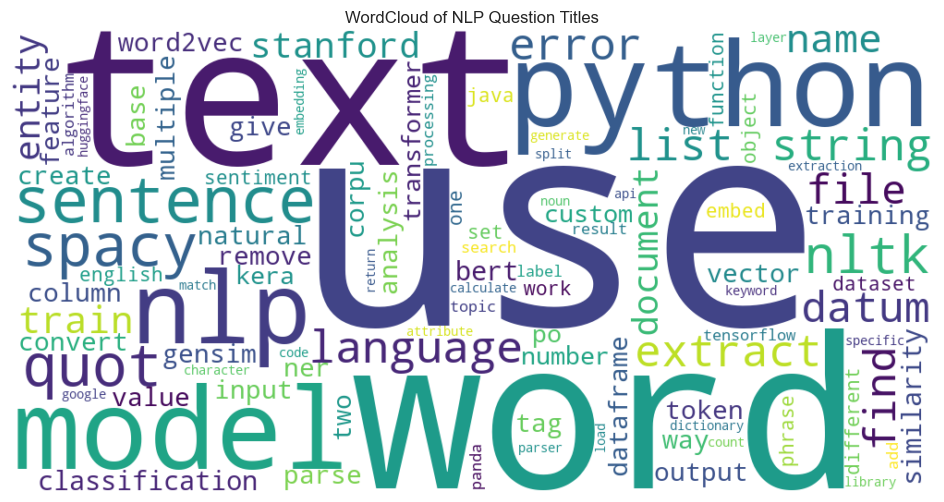

In [14]:
# Generate a word cloud visualization to identify the most common terms in NLP question titles
# Word clouds provide an intuitive visual representation of term frequency where size corresponds to frequency
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all preprocessed title tokens into a single large text string
# This creates the input text for the word cloud generator
title_text = " ".join([" ".join(tokens) for tokens in merged_df['title_tokens'].dropna()])

# Create word cloud object with specific parameters
wordcloud = WordCloud(
    width=1000,  # Width of the output image
    height=500,  # Height of the output image
    background_color='white',  # White background makes the words more visible
    max_words=100,  # Limit to the 100 most frequent words for clarity
    collocations=False  # Avoid treating "machine learning" as a single term/phrase
).generate(title_text)  # Generate the word cloud from our text

# Visualize the generated word cloud
plt.figure(figsize=(12, 6))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the image
plt.axis("off")  # Hide the axes for cleaner visualization
plt.title("WordCloud of NLP Question Titles")  # Add a title
plt.show()  # Display the plot



# Module 5: Categorization

In this module, we will:
- Categorize posts based on presence of keywords in titles or bodies.


In [15]:
# Lightweight preprocessing function for titles
# Unlike the full preprocessing function used earlier, this one:
# 1. Only performs tokenization and punctuation removal
# 2. Deliberately keeps question words (what, how, why, etc.) which are important for classification
# 3. Preserves more of the original text for better categorization of questions
import string
from nltk.tokenize import word_tokenize


def preprocess_title_light(text):
    if not isinstance(text, str):
        # Handle non-string inputs by returning empty list
        return []
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())
    # Remove only punctuation, keeping all words including stopwords
    tokens = [t for t in tokens if t not in string.punctuation]
    return tokens


# Apply the lightweight preprocessing to titles and store in a new column
# This will be used for categorization where question words are important
merged_df['title_tokens_light'] = merged_df['title'].apply(preprocess_title_light)


In [16]:
# Extract and normalize tags from different possible formats
# Stack Exchange API might return tags in different formats:
# - As a list of strings: ['python', 'nlp', 'bert']
# - As a string with HTML-like format: '<python><nlp><bert>'
# This function handles both formats and normalizes tags to lowercase
import re


def extract_tags(tag_entry):
    if isinstance(tag_entry, list):
        # If tags are already in list format, just convert to lowercase
        return [tag.lower() for tag in tag_entry]
    elif isinstance(tag_entry, str) and tag_entry.startswith("<"):
        # If tags are in HTML-like format, extract using regex
        return re.findall(r'<(.*?)>', tag_entry.lower())
    else:
        # Return empty list for any other format or None values
        return []


# Apply the extraction function to create a new column with normalized tags
merged_df['tag_tokens'] = merged_df['tags'].apply(extract_tags)


In [20]:
merged_df[:10]


,question_id,title,body_markdown,tags,accepted_answer_id,accepted_answer_body,title_tokens,question_tokens,answer_tokens,tag_tokens,title_tokens_light,categories
0,307291,How does the Google &quot;Did you mean?&quot; ...,I&#39;ve been developing an internal website f...,"[algorithm, machine-learning, nlp, spell-check...",307344.0,Here&#39;s the explanation directly from the s...,"[google, quot, mean, quot, algorithm, work]","[39, develop, internal, website, portfolio, ma...","[39, explanation, directly, source, almost, lt...","[algorithm, machine-learning, nlp, spell-check...","[how, does, the, google, quot, did, you, mean,...",[Conceptual Understanding]
1,8897593,How to compute the similarity between two text...,I want to take two documents and determine how...,"[python, nlp]",8897648.0,The common way of doing this is to transform t...,"[compute, similarity, two, text, document]","[want, take, two, document, determine, similar...","[common, way, transform, document, tf, -, idf,...","[python, nlp]","[how, to, compute, the, similarity, between, t...","[Implementation Issues, NLP Tasks]"
2,52455774,googletrans stopped working with error &#39;No...,I was trying `googletrans` and it was working ...,"[python, nlp, google-translate, googletrans]",52456197.0,**Update 01/12/2020:** This issue re-emerged l...,"[googletrans, stop, work, error, 39, nonetype,...","[try, work, quite, well, since, morning, start...","[update, 01/12/2020, issue, re, -, emerge, lat...","[python, nlp, google-translate, googletrans]","[googletrans, stopped, working, with, error, 3...",[Implementation Issues]
3,1787110,What is the difference between lemmatization v...,When do I use each ?\r\n\r\nAlso...is the NLTK...,"[nlp, nltk, lemmatization]",1787121.0,Short and dense: [http://nlp.stanford.edu/IR-b...,"[difference, lemmatization, vs, stem]","[use, also, ..., nltk, lemmatization, dependen...","[short, dense, gt, goal, stem, lemmatization, ...","[nlp, nltk, lemmatization]","[what, is, the, difference, between, lemmatiza...","[Conceptual Understanding, Tool Specific]"
4,39142778,How to determine the language of a piece of text?,I want to get this: \r\n\r\n```none\r\nInput t...,"[python, nlp]",39143059.0,Have you had a look at [langdetect][1]?\r\n\r\...,"[determine, language, piece, text]","[want, get, python]","[look, langdetect, 1, langdetect, import, dete...","[python, nlp]","[how, to, determine, the, language, of, a, pie...","[Implementation Issues, NLP Tasks]"
5,1833252,Java Stanford NLP: Part of Speech labels?,"The Stanford NLP, demo&#39;d [here][1], gives ...","[java, nlp, stanford-nlp, part-of-speech]",1833718.0,[The Penn Treebank Project][1]. Look at the [P...,"[java, stanford, nlp, part, speech, label]","[stanford, nlp, demo, 39, 1, give, output, lik...","[penn, treebank, project, 1, look, part, -, of...","[java, nlp, stanford-nlp, part-of-speech]","[java, stanford, nlp, part, of, speech, labels]",[]
6,54334304,spaCy: Can&#39;t find model &#39;en_core_web_s...,What is the difference between `spacy.load(&#3...,"[python, python-3.x, nlp, spacy]",54409674.0,The answer to your misunderstanding is a Unix ...,"[spacy, 39, find, model, 39, en_core_web_sm, 3...","[difference, link, 1, explain, different, mode...","[answer, misunderstand, unix, concept, softlin...","[python, python-3.x, nlp, spacy]","[spacy, can, 39, t, find, model, 39, en_core_w...",[Tool Specific]
7,34870614,What does tf.nn.embedding_lookup function do?,"tf.nn.embedding_lookup(params, ids, partit...","[python, tensorflow, deep-learning, word-embed...",34877590.0,`embedding_lookup` function retrieves rows of ...,"[tf.nn.embedding_lookup, function]","[tf.nn.embedding_lookup, param, ids, partition...","[function, retrieve, row, tensor, behavior, si...","[python, tensorflow, deep-learning, word-embed...","[what, does, tf.nn.embedding_lookup, function,...",[Conceptual Understanding]
8,15547409,How to get rid of punctuation using NLTK token...,I&#39;m just starting to use NLTK and I don&#3...,"[pyth

In [19]:
# Function to classify NLP posts into different categories based on content and tags
# This classification helps understand the types of questions being asked in the NLP community
def classify_nlp_post(title_tokens, tag_tokens=None):
    if not isinstance(title_tokens, list):
        # Handle invalid input
        return []

    # Join tokens back into a string for regex pattern matching
    title_str = " ".join(title_tokens)
    # Ensure tags is a list or empty list if None
    tags = tag_tokens if isinstance(tag_tokens, list) else []

    # List to store all categories that apply to this post
    categories = []

    # Category 1: Implementation Issues
    # Posts about code problems, errors, installation, or how-to questions
    if re.search(r'\b(how to|how can|cannot|error|run|install|setup|example|code|guide)\b', title_str):
        categories.append("Implementation Issues")

    # Category 2: Conceptual Understanding
    # Posts asking for explanations, definitions, or understanding concepts
    if re.search(r'\b(what is|what does|explain|difference|definition|how does)\b', title_str):
        categories.append("Conceptual Understanding")

    # Category 3: Tool Specific
    # Posts about specific NLP libraries or frameworks
    tool_keywords = ["nltk", "spacy", "transformers", "huggingface", "gensim", "fasttext", "flair"]
    if any(tool in title_tokens for tool in tool_keywords) or any(tool in tags for tool in tool_keywords):
        categories.append("Tool Specific")

    # Category 4: NLP Tasks
    # Posts about specific NLP tasks or techniques
    task_keywords = ["tokenize", "stem", "lemmatize", "classification", "translation", "similarity", "ner", "pos",
                     "language"]
    if any(task in title_tokens for task in task_keywords) or any(task in tags for task in task_keywords):
        categories.append("NLP Tasks")

    return categories


# Apply the classification function to each row in the dataframe
# This creates a new column 'categories' containing a list of applicable categories for each post
merged_df['categories'] = merged_df.apply(
    lambda row: classify_nlp_post(row['title_tokens_light'], row['tag_tokens']), axis=1
)



In [25]:
# Count the frequency of each category across all posts
# This helps understand the distribution of question types in the dataset
from collections import Counter

# Flatten the list of categories from all posts and count occurrences
all_cats = sum(merged_df['categories'], [])  # Combines all category lists into one flat list
cat_counts = Counter(all_cats)  # Counts occurrences of each category
print(cat_counts)  # Display the counts


Counter({'Implementation Issues': 5305, 'Tool Specific': 5156, 'NLP Tasks': 3123, 'Conceptual Understanding': 563})


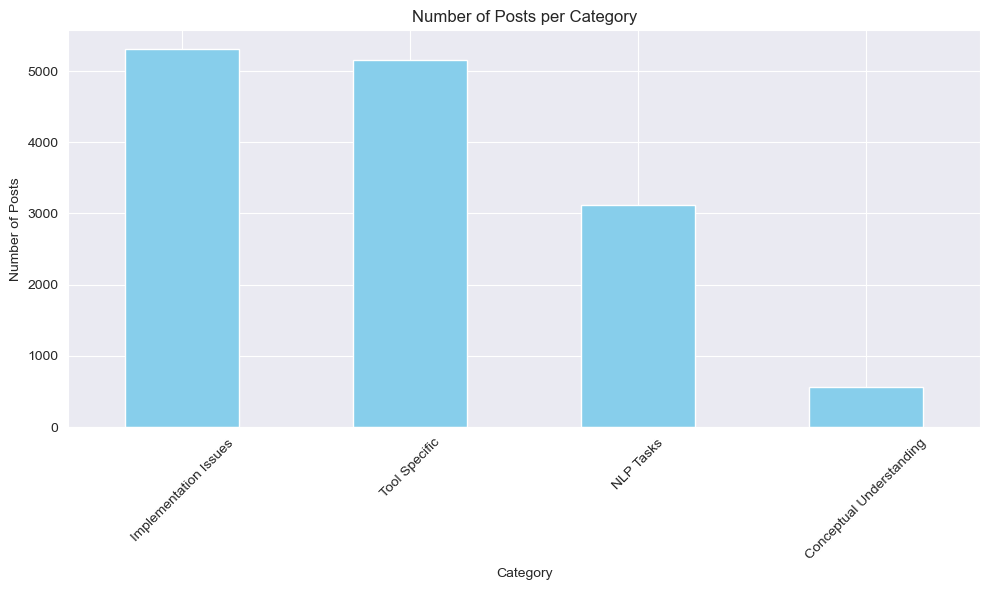

In [27]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Flatten list of categories and count occurrences
all_categories = [cat for sublist in merged_df['categories'] for cat in sublist]
category_counts = Counter(all_categories)

# Plot
plt.figure(figsize=(10, 6))
pd.Series(category_counts).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Posts per Category')
plt.ylabel('Number of Posts')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Display random examples of posts from each category
# This helps validate the classification and understand what kinds of questions fall into each category
pd.set_option('display.max_colwidth', None)
for cat in ['Implementation Issues', 'Conceptual Understanding', 'Tool Specific', 'NLP Tasks']:
    print(f"\n🧩 Category: {cat}")
    # Filter posts that belong to the current category and display 10 random examples
    display(merged_df[merged_df['categories'].apply(lambda x: cat in x)][['title']].sample(10, random_state=42))



🧩 Category: Implementation Issues


,title
3415,How to measure how distinct a document is based on predefined linguistic categories?
15424,ERROR: Could not find a version that satisfies the requirement en-core-web-sm==3.5.0
18134,Python &quot;Invalid Argument&quot; error while reading large txt file
11906,How to split big compressed text file to small text files
7419,How to search a text for compound phrases that may be separated in the text; in python?
5344,How to use GPT-2 for topic modelling?
6903,how to extract text from a selection of pages in a larger pdf using pymupdf?
12239,NLP text classification CountVectorizer Shape Error
17279,How can I make a list of three sentences to a string?
7216,How to resolve the following issue: NameError: name &#39;nlp&#39; is not defined?



🧩 Category: Conceptual Understanding


,title
6688,Spacy pattern matcher. What does &quot;IN&quot; mean?
18772,train LUIS to understand the difference between &quot;I am interested&quot; and &quot;I am not interested&quot;
7261,What is meant by ‘define model class’ in pytorch documentation?
687,What&#39;s the difference between WordNet 3.1 and WordNet 3.0?
19790,What is the difference between BertModel vs Bertforsequenceclassification?
9737,How does Byte-pair Encoding handle equally frequent pairs?
6595,what is workers parameter in word2vec in NLP
18642,What does one do with the POS labelled as &#39;Conjunction&#39; while WordNet lemmatization?
1137,How does one use accelerate with the hugging face (HF) trainer?
19066,CoreNLP Neural Network Dependency Parser - Difference between evaluation during training versus testing



🧩 Category: Tool Specific


,title
9720,Input/Target size mismatch when training a downstream BERT for classification (huggingface pretrained)
1379,Doc2vec: Only 10 docvecs in gensim doc2vec model?
9412,How to train doc2vec with pre-built vocab in gensim
12474,Is there a way to determine part of speech patterns in a dataset of sentences?
20037,How to use HuggingFace Model on my own dataset?
7318,Huggingface NER with custom data
2629,Mixing words and PoS tags in NLTK parser grammars
11138,Which tokenizer to use for the Brown tagset?
2038,How to train Spacy3 project with FP16 mixed precision
3614,Spacy Remove stopwords without affecting Named Entities



🧩 Category: NLP Tasks


,title
19374,Effectively parsing plain language paragraphs
19134,POS tagging using nltk takes time
16938,Is there a way of creating a cosine similarity matrix between sentence embeddings having different values?
1153,"Tokenize, remove stop words using Lucene with Java"
18906,Training nltk tagger with Indian POS data
15514,How do I implement a model that finds a correlation (not similarity) between query and target sentence?
16449,tokenizing: how to not tokenize punctuation like `^* in python for NLP
14053,Possible error with Stanford POS Tagger and classifying intent and the replies
7728,Train classifier (natural - NLP) on node.js for unexpected sentences
12031,Stanford CoreNLP example on Arabic Language
